In [1]:
from pathlib import Path 

import matplotlib.pyplot as plt 
import pandas as pd 
import networkx as nx

In [2]:
# データ読み込み
# colはfrom, toになっているが、向きはないことに注意
data_path = Path("./data/work_1.csv")
data_df = pd.read_csv(data_path, index_col=None)
print(data_df.head())

       from     to color
0     ウクライナ    ロシア   red
1     イスラエル   ガザ地区   red
2     イスラエル   レバノン   red
3  アゼルバイジャン  アルメニア   red
4      エジプト  イスラエル   red


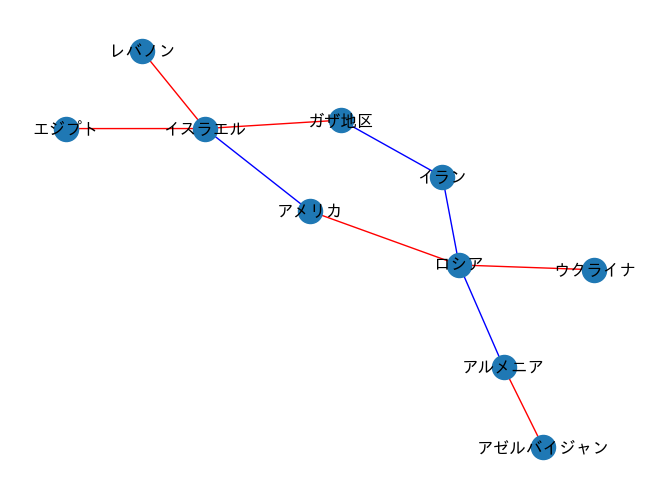

In [3]:
# 無向グラフ
G = nx.Graph() 

# ノードを追加
# エッジを追加するときに、その名前のノードがないと自動的に追加してくれるらしいが、一応入れておけば良いでしょう
vertex_list: list[str] = []
for index, data in data_df.iterrows(): 
    vertex_list.append(data["from"])
    vertex_list.append(data["to"])
G.add_nodes_from(set(vertex_list))
    
# エッジを追加
# 適当にやると、edgeの色が思った通りにならない
# G.edgesの順番と、edge_colorの順番を対応させる必要がある（しかも、G.edgesの順番はaddした順番とは限らない！）
# add_edgeするときに、色も情報に入れられるようにすればいいだけだろ！！！
edge_color_dict: dict[tuple[str, str], str] = {}   # edgeに対応する色を管理するdict
for index, data in data_df.iterrows(): 
    G.add_edge(data["from"], data["to"])
    edge_color_dict[(data["from"], data["to"])] = data["color"]
    edge_color_dict[(data["to"], data["from"])] = data["color"]   # Gの中でtupleの順番が変わるため、逆側も持っておく必要あり
    
# G.edgesの順番とedge_colorの順番を対応させる
edge_color_list: list[str] = []
for pair in G.edges: 
    edge_color_list.append(edge_color_dict[pair])

# 描画
nx.draw(G, with_labels=True, edge_color=edge_color_list, font_family='IPAGothic')   # 面倒なことをしなくても、これだけで日本語表示してくれるらしいです
plt.show()